In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

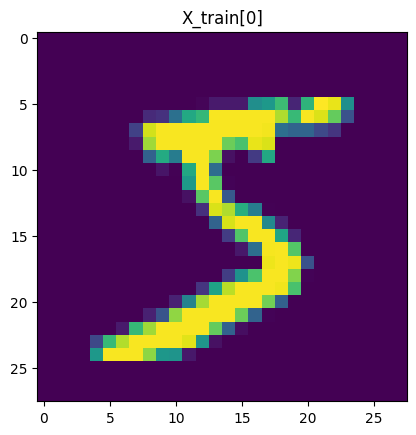

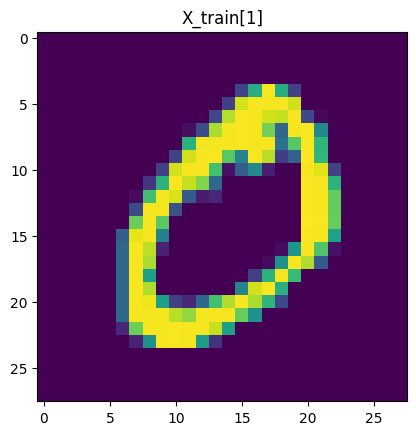

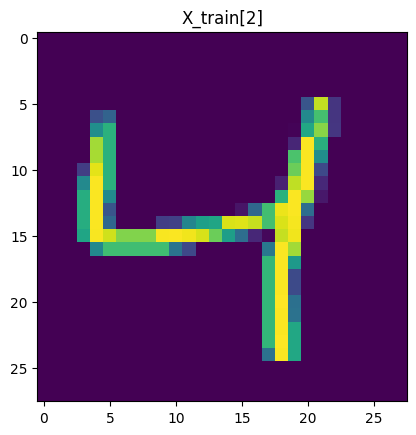

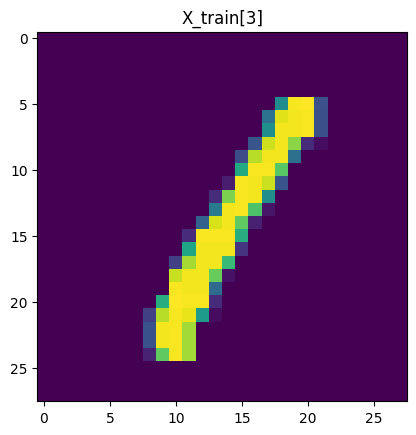

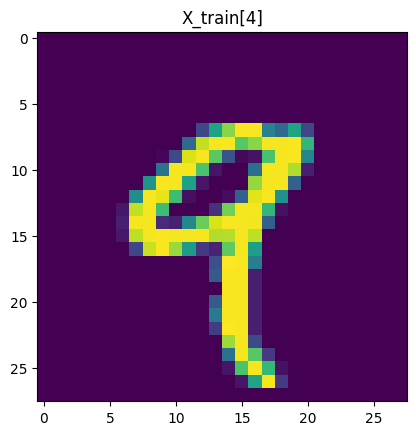

Size of X_train: 60000
Shape of X_train: (60000, 28, 28)
Size of y_train: 60000
Shape of y_train: (60000,)


In [36]:
# Wczytanie i przetworzenie danych
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizacja

for i in range(5):
    plt.imshow(x_train[i])
    plt.title(f"X_train[{i}]")
    plt.show()

print(f"Size of X_train: {len(x_train)}")
print(f"Shape of X_train: {x_train.shape}")
print(f"Size of y_train: {len(y_train)}")
print(f"Shape of y_train: {y_train.shape}")

image_width = 28
image_height = 28

# Zmiana kształtu danych do formatu CNN
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Augmentacja danych (usunięto horizontal_flip)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

In [28]:
# Budowanie modelu CNN
cnn_model = models.Sequential([
    layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (4, 4), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (4, 4), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Trenowanie modelu z augmentacją danych i Early Stopping
data = datagen.flow(x_train, y_train, batch_size=5)
cnn_model.fit(data,
          epochs=1,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

# Ewaluacja modelu
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Funkcja do przetwarzania obrazów rysowanych przez użytkowników
def preprocess_user_drawn_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=1)
    img = tf.image.resize(img, [28, 28])
    img /= 255.0
    img = tf.expand_dims(img, 0)
    return img

# Zapisywanie modelu
cnn_model.save("letters_cnn_model.keras")
cnn_model.save_weights("letters_cnn_model_weights.h5")

12000/12000 [==============================] - 143s 12ms/step - loss: 0.2165 - accuracy: 0.9326 - val_loss: 0.0501 - val_accuracy: 0.9852
313/313 - 3s - loss: 0.0501 - accuracy: 0.9852 - 3s/epoch - 9ms/step

Test accuracy: 0.9851999878883362


In [40]:
# Wczytywanie modelu
cnn_model = tf.keras.models.load_model('./letters_cnn_model.keras')

# Ścieżka do obrazu użytkownika
image_path = './1_number.png'
new_image = preprocess_user_drawn_image(image_path)

class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Predykcja na nowych danych
predictions = cnn_model.predict(new_image)
predicted_class = np.argmax(predictions)
print(f"Predictions: {predictions}")
print('Predicted number:', class_names[predicted_class])

1/1 [==============================] - 0s 82ms/step
Predictions: [[0.00233465 0.00350181 0.03199533 0.00251043 0.34426224 0.09540915
  0.0065812  0.01215224 0.48788473 0.01336825]]
Predicted number: 8
